In [1]:
# !pip install spotipy

In [2]:
import sys
import spotipy
import yaml
import spotipy.util as util
from pprint import pprint

def load_config():
    global user_config
    stream = open('config.yaml')
    user_config = yaml.load(stream)

load_config()

token = util.prompt_for_user_token(user_config['username'], scope='playlist-modify-private,playlist-modify-public', client_id=user_config['client_id'], client_secret=user_config['client_secret'], redirect_uri=user_config['redirect_uri'])
if token:
    sp = spotipy.Spotify(auth=token)
    print(f'Token acquired: {token}')
else:
    print ("Can't get token for", user_config['username'])

Token acquired: BQDHSCzYoNpcusn93btxozCl8NpHgIZYxw18dvKfuQfnWjyMCChCK3JRriJWz_fJfBjWxLHs4IJwtgf-ZW1SAoBWWR4WqpOLqj4Pe5kNZkV2I4uPZ5t4l6thlOA0-8MS6qbVoIUqPg55trLQMm5cXxkdBK65Cqkak2BdZk6Ze4dss5YqU-iBRBFBCIq-jhiPDIHrDcfrr1D5jqTZLicQzuk-rYoQ9hNevyOjSXsm7Fon4g4x3m4MUSlTqvA9U-UHLVAtnQY


/tmp/ipykernel_141566/2230760731.py:10: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  user_config = yaml.load(stream)


In [3]:
song_groupings = []

for i in range(0, 2):
    song_groupings.append(sp.playlist_items(user_config['playlist_id'], offset=i*100))


In [6]:
artist_counts = {}
dates_added = []

for grouping in song_groupings:
    for song in grouping['items']:
        artist = song['track']['artists'][0]['name']
        if artist in artist_counts:
            artist_counts[artist] += 1
        else:
            artist_counts[artist] = 1
        
        dates_added.append(song['added_at'])

pprint(artist_counts)

print(f"Total artist references: {sum(artist_counts.values())}")
print(f"Total songs: {sum([len(grouping['items']) for grouping in song_groupings])}")

{'3 Doors Down': 1,
 'A$AP Rocky': 1,
 'All Time Low': 1,
 'Ariana Grande': 2,
 'Arizona Zervas': 1,
 'Artemas': 1,
 'BABY GRAVY': 3,
 'Benson Boone': 3,
 'Big Sean': 1,
 'Cartoon': 1,
 'Central Cee': 1,
 'Cody Ko': 4,
 'Coldplay': 1,
 'Confetti': 1,
 'Connor Price': 17,
 'DJ Snake': 1,
 'Darci': 1,
 'David Guetta': 1,
 'Djo': 1,
 'Doja Cat': 2,
 'Don Toliver': 1,
 'Dxrk ダーク': 1,
 'Ed Sheeran': 1,
 'Eminem': 10,
 'Flo Rida': 1,
 'G-Eazy': 1,
 'Gunna': 1,
 'Hoodie Allen': 1,
 'JAY-Z': 1,
 'Jack Harlow': 6,
 'Juicy J': 1,
 'Justin Bieber': 1,
 'KSI': 1,
 'Kanye West': 1,
 'Kendrick Lamar': 1,
 'Khantrast': 2,
 'Kordhell': 1,
 'Lay Bankz': 1,
 'Lil Dicky': 5,
 'Lil Peep': 1,
 'Logic': 9,
 'Lord Huron': 1,
 'Lost Sky': 1,
 'M83': 2,
 'Macklemore & Ryan Lewis': 1,
 'Matt Corman': 1,
 'Mustard': 1,
 'NEFFEX': 11,
 'NF': 22,
 'NOEL': 4,
 'Nic D': 1,
 'No-uh': 1,
 'Oliver Tree': 1,
 'Owl City': 1,
 'Polo G': 1,
 'Post Malone': 1,
 'Quinn XCII': 1,
 'Regard': 1,
 'Rob Bailey & The Hustle Standa

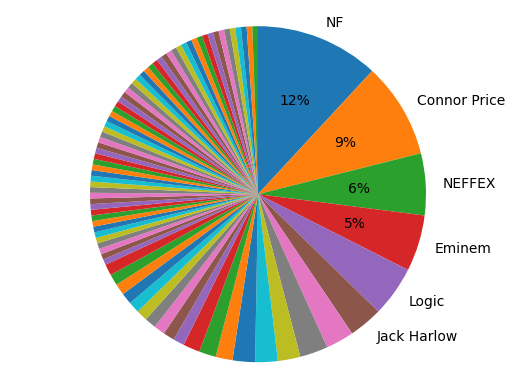

In [5]:
# create pie chart of artist counts
def autopct_more_than_threshold(pct):
    return ('%1.f%%' % pct) if pct > 5 else ''

import matplotlib.pyplot as plt

# sort in decreasing order
artist_counts = {k: v for k, v in sorted(artist_counts.items(), key=lambda item: item[1], reverse=True)}
labels = list(map(lambda x: x if artist_counts[x] > 5 else '', artist_counts.keys()))

plt.pie(artist_counts.values(), labels=labels, autopct=autopct_more_than_threshold, counterclock=False, startangle=90)
plt.axis('equal')
plt.show()